In [28]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [33]:

boston = load_boston()

In [32]:

boston.data.shape

(506, 13)

In [34]:

# Importamos el conjunto de datos 
df = pd.DataFrame(boston.data) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.1)

In [36]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [37]:
lr.score(X_test, Y_test)

0.5461951561619811

In [38]:
scores = cross_val_score(lr, boston.data, boston.target, cv=7, scoring='neg_mean_squared_error')

In [39]:
scores.mean()

-37.28723086835312

In [40]:
scores.std()

46.78955638802006

In [41]:
scores = cross_val_score(lr, boston.data, boston.target, cv=10, scoring='r2')

In [42]:
scores.mean()

0.20252899006056463

In [43]:
scores.std()

0.595296016951227

In [44]:
print('y = ' + str(lr.intercept_) + ' ')

y = 32.63250010221407 


In [45]:
for i, c in enumerate(lr.coef_):
          print(str(c) + ' * x' + str(i))

-0.11048036476064396 * x0
0.04168227196765742 * x1
0.02341050458173691 * x2
2.7012775167324694 * x3
-14.567518858472123 * x4
4.108569923121064 * x5
-0.0030543913295599423 * x6
-1.3988512051859543 * x7
0.29438245785459005 * x8
-0.012154238103637404 * x9
-0.9362143422378394 * x10
0.009752166913011945 * x11
-0.5467394789700551 * x12


the r-squared is:  0.976847104150209
the coefficient (value of a) for age, weight, constant is:  [ 0.86141469  0.3348592  30.99410295]


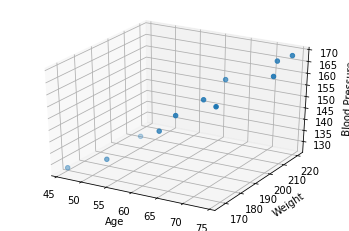

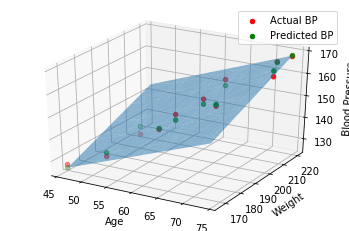

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create arrays for the data points
X = []
Y = []

#read the csv file
csvReader = open('BloodPressure.csv')

#skips the header line
csvReader.readline()

for line in csvReader:
    y, x1, x2 = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))

# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for age, weight, constant is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')
ax.legend()
plt.show()